<a href="https://colab.research.google.com/github/jugernaut/ManejoDatos/blob/desarrollo/AlgoritmosBusqueda/05_TablasHash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tablas de Dispersión**

Profesor: M. en C. Miguel Angel Pérez León

Ayudante: Jesús Iván Coss Calderón

Materia: Manejo de Datos

##**Introducción**

Las $\color{blue}{tablas\, de\, dispersi\acute{o}n\, o\, tablas\, hash}$, es otro tipo de estructura de datos que es empleado ampliamente en el campo de las ciencias. Este tipo de estructura de datos se encarga de mapear un conjunto de valores (values) a su correspondiente llave (key).

Para llevar a cabo dicho mapeo se hace uso de una función conocida como $\color{blue}{funci\acute{o}n\, hash}$.

De igual manera que con las estructuras vistas previamente las tablas hash permiten almacenar el tipo de información que se necesite, desde simples valores numéricos, hasta información mas compleja.

El principal elemento que define una tabla hash, es su función hash (función de dispersión), ya que a través de esta función se acceden a los valores almacenados y de esta manera podemos buscar un valor, insertar o eliminar un valor asociado a una llave.

### Usos de tablas Hash

Las tablas hash son empleadas en muchas áreas, por ejemplo:

**Bancos**: normalmente los clientes son asociados a una llave (cuenta), de manera tal que se puede acceder a los datos del cliente mediante esta llave.

**Hospitales**: al igual que en un banco, es mas sencillo acceder a los datos de un paciente empleando una llave, por ejemplo su RFC o su CURP. De esta manera se accede al historial del paciente empleando una llave, ademas esta llave esta asociada con uno y solo un paciente. 

**Bases de datos**: de manera general podemos pensar que en la mayoría de las bases de datos los registros almacenados contienen un identificador que funciona como llave y a través de esta llave se accede al valor almacenado en la base de datos.

##**Función Hash**



### Características 

La función hash depende en gran medida del $\color{blue}{conjunto\, de\, llaves\, (dominio)}$ sobre el cual sera definida y también depende del $\color{blue}{uso\, que\, se\, le\, vaya\, a\, dar}$ al la tabla hash.

Sin embargo existen 3 propiedades que siempre debe cumplir una función hash. 

Debe ser inyectiva o dicho de otra manera, debe $\color{blue}{evitar\, colisiones}$ en la medida de lo posible, es decir. Sea $f$ la función hash, $X$ el conjunto de llaves (dominio) y Y el conjunto de valores (codominio). $$f:X\rightarrow Y\,\,\,\,\forall a,b\in X\,\mid f(a)=f(b)\Rightarrow a=b$$.

No debe involucrar demasiados cálculos, ya que de otra manera las operaciones sobre la tabla hash incrementan su costo (recursos).

No debe ser posible su reconstrucción tomando como base la salida de esta.

### Ejemplo función hash

\begin{array}{|c|}
\hline
\color{green}{Polinomio\,de\,direccionamiento}\\
\hline
\end{array}

$$Sea\,A\in M_{2x2}=\left(\begin{array}{cc}
3_{(0,0)} & 6_{(0,1)}\\
7_{(1,0)} & 9_{(1,1)}
\end{array}\right)$$

Por razones de espacio en memoria, necesitamos almacenar los elementos de $A$ en un objeto lineal, digamos una lista. De tal manera que los elementos de $A$ se vean así $\left[\begin{array}{cccc}
3 & 6 & 7 & 9\end{array}\right]$. Dicho en otras palabras, necesitamos mapear las tuplas que representan las posiciones de los valores de A en posiciones dentro de la lista.

Para llevar a cabo este mapeo necesitamos una función hash, que en este caso dicha función debe tomar una tupla que representa la entrada de $A$ y debe devolver una localidad de la lista. Es decir.

$$X=\{(0,0),(0,1),(1,0),(1,1)\},Y=\{0,1,2,3\},f:X\rightarrow Y$$

Nos gustaría que la entrada (0,0) de A fuera mapeada a la localidad 0 de la lista y así sucesivamente hasta llegar a que la entrada (1,1) se mapeara a la localidad 3 del arreglo, es decir

\begin{array}{cc}
f((0,0))=0 & f((0,1))=1\\
f((1,0))=2 & f((1,1))=3
\end{array}

Podríamos pensar que una buena forma de definir a $f$, seria $f((x,y))=x+y$, pero veamos que sucede al probarla.

\begin{array}{c}
f((0,0))=0+0=0.......\text{{\color{green}¡bien!}}\\
f((0,1))=0+1=1.......\text{{\color{green}¡bien!}}
\end{array}




\begin{array}{c}
f((1,0))=1+0=1.......\text{\color{red}\text{¡colisión!}}\\
f((0,1))=1=f((1,0))
\end{array}

Dado que se tuvo una colisión, es necesario re-definirla de otra manera menos ingenua. Veamos que sucede si definimos a $f$ de la siguiente manera.

$$f((x,y))=2x+y$$

Al probarla, lo que obtenemos es.\begin{array}{c}
f((0,0))=2*0+0=0\\
f((0,1))=2*0+1=1\\
f((1,0))=2*1+0=2\\
f((1,1))=2*1+1=3
\end{array}

Esta función, no muestra colisiones (al menos en el dominio y codominio definidos), incluso se podría probar que no presentará colisiones para ningún par de tuplas de naturales. Ademas cumple con el resto de las propiedades

### Forma general del polinomio de direccionamiento

Así que podemos pensar, que para el caso particular de matrices bidimensionales $A_{(i,j)}\in M_{ren\,x\,col}$ podemos definir la función hash que mapea localidades de dicha matriz en una lista (arreglo) unidimensional de la siguiente forma.

$$f((i,j))=col*i+j$$

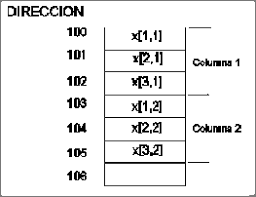

FIGURA: Polinomio de Direccionamiento

### Ventajas y desventajas de una tabla hash

Ya que vimos como es que se construye y se utiliza una tabla de dispersión, vamos a analizar sus ventajas y desventajas:

* La principal ventaja es que el orden de complejidad para $\color{blue}{insertar,\, buscar\, o\, eliminar\, un\, elemento\, en\, una\, tabla\, hash\, es}$ $\color{blue}{constante}$, es decir $O(1)$.

* Si la función hash fue definida siguiendo las características que se piden para este tipo de funciones, utilizar una tabla hash se vuelve un procedimiento muy $\color{blue}{eficiente}$ y $\color{blue}{seguro}$.

* La principal desventaja de una tabla hash es el hecho de que $\color{red}{ni\, las\, llaves,\, ni\, los}$ $\color{red}{valores\, están\, obligados\, a\, conservar\, un\, orden}$, así que es difícil ordenar por algún criterio una tabla hash.

* Otra desventaja es que $\color{red}{a\, veces\, es\, complicado\, evitar\, las\, colisiones}$, así que se tiene que hacer uso de alguna técnica adicional para poder resolver las colisiones.

##**Diccionarios en Python**



### Diccionarios

Dado que las tablas de dispersión son muy útiles, la gran mayoría de los lenguajes ya cuenta con alguna implementación de estas, sin embargo a veces es necesario revisar la documentación para poder hacer uso de estas implementaciones. 

Por el contrario, Python muy a su estilo (Pythonic way) cuenta con una implementación (de las muchas que existen) de las tablas de dispersión conocida como $\color{blue}{diccionarios}$. Esta implementación es muy sencilla e intuitiva de utilizar.

La idea detrás de los diccionarios de Python es básicamente la misma que la de las tablas de dispersión, con la peculiaridad de que el usuario no esta obligado a definir la funcion hash.

Es decir que es suficiente con proporcionar la llave y el valor asociado a esta y python se encarga de relacionarlos.

### Sintaxis de los diccionarios

Este tipo de estructuras se emplea en $\color{blue}{data\, minig}$ o $\color{blue}{big\, data}$. A continuación se muestra un ejemplo de como usar los diccionarios de Python.

* **diccionario = {}** #instrucción para crear un diccionario vacío.

* **diccionario['llave'] = valor** #insertamos una llave y un valor en caso de no existir ó se actualiza el valor asociado a la llave.

* **print diccionario** #se imprime el diccionario.

* **del diccionario[llave]** #borra la llave y valor asociado a esta.

* **diccionario.clear()** #borra todas las llaves y valores dentro del diccionario.

## **Apendice**



### Referencias

*  Thomas H. Cormen: Introduction to Algorithms.

* Libro Web: Introduccion a Python.

* Daniel T. Joyce: Object-Oriented Data Structures.

* John C. Mitchell: Concepts in programing Languages.